In [156]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('Project/pdata/happy_0814.csv')
df['country']= df['country'].astype("category")
df['year']= df['year'].astype("category")
df['country_num']= df['country_num'].astype("category")
df['continent']= df['continent'].astype("category")
ndf=df.sample(frac=1,random_state=4).reset_index(drop=True)  # random_state 안 하면 DW가 실행시마다 달라짐
ndf

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent
0,Nicaragua,2018,5.819,8.647,0.854,67.50,0.797,0.009,0.713,6.7,7.271933,1.606224,13.48,2.404,6.731602,558,Nor.A
1,Ghana,2012,5.057,8.397,0.685,54.86,0.679,0.040,0.898,6.8,2.164331,0.829040,5.47,4.192,2.803341,288,AF
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,2.8,2.483526,0.648848,2.67,5.576,1.761833,204,AF
3,Sri Lanka,2017,4.331,9.440,0.823,67.00,0.827,0.094,0.844,10.9,2.047085,3.587271,9.41,2.206,6.312512,144,AS
4,Bangladesh,2015,4.633,8.216,0.601,62.80,0.815,-0.068,0.721,5.2,0.184365,1.091818,4.26,2.120,5.490531,50,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Colombia,2011,6.464,9.442,0.904,65.92,0.811,-0.073,0.847,7.5,0.240863,1.313381,9.64,1.958,5.655645,170,SA
1877,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,6.1,2.232304,2.190966,4.46,2.333,4.357688,356,AS
1878,Denmark,2017,7.594,10.916,0.952,72.10,0.955,0.155,0.181,12.6,8.592318,1.281387,7.61,1.750,6.558833,208,EU
1879,Bhutan,2014,4.939,9.167,0.880,59.90,0.834,0.268,0.650,3.1,1.656511,1.163591,6.14,2.067,5.800284,64,AS


In [157]:
# 군집분류
from sklearn import cluster
X = ndf[['HS']]
kmeans = cluster.KMeans(init='k-means++', n_clusters = 3, n_init = 10,random_state=4)
kmeans.fit(X)                 
cluster_label = kmeans.labels_
print(cluster_label)

[0 0 1 ... 2 0 1]


In [158]:
ndf['cluster'] = cluster_label
ndf

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent,cluster
0,Nicaragua,2018,5.819,8.647,0.854,67.50,0.797,0.009,0.713,6.7,7.271933,1.606224,13.48,2.404,6.731602,558,Nor.A,0
1,Ghana,2012,5.057,8.397,0.685,54.86,0.679,0.040,0.898,6.8,2.164331,0.829040,5.47,4.192,2.803341,288,AF,0
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,2.8,2.483526,0.648848,2.67,5.576,1.761833,204,AF,1
3,Sri Lanka,2017,4.331,9.440,0.823,67.00,0.827,0.094,0.844,10.9,2.047085,3.587271,9.41,2.206,6.312512,144,AS,1
4,Bangladesh,2015,4.633,8.216,0.601,62.80,0.815,-0.068,0.721,5.2,0.184365,1.091818,4.26,2.120,5.490531,50,AS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Colombia,2011,6.464,9.442,0.904,65.92,0.811,-0.073,0.847,7.5,0.240863,1.313381,9.64,1.958,5.655645,170,SA,2
1877,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,6.1,2.232304,2.190966,4.46,2.333,4.357688,356,AS,1
1878,Denmark,2017,7.594,10.916,0.952,72.10,0.955,0.155,0.181,12.6,8.592318,1.281387,7.61,1.750,6.558833,208,EU,2
1879,Bhutan,2014,4.939,9.167,0.880,59.90,0.834,0.268,0.650,3.1,1.656511,1.163591,6.14,2.067,5.800284,64,AS,0


In [159]:
ndf.replace({'cluster': 0}, {'cluster': 'Mid'},inplace=True)
ndf.replace({'cluster': 1}, {'cluster': 'Low'},inplace=True)
ndf.replace({'cluster': 2}, {'cluster': 'High'},inplace=True)
ndf

,country,year,HS,log_gdp,social,life_exp,freedom,generosity,corruption,schooling,alcohol,suicide,obesity,birth,mental,country_num,continent,cluster
0,Nicaragua,2018,5.819,8.647,0.854,67.50,0.797,0.009,0.713,6.7,7.271933,1.606224,13.48,2.404,6.731602,558,Nor.A,Mid
1,Ghana,2012,5.057,8.397,0.685,54.86,0.679,0.040,0.898,6.8,2.164331,0.829040,5.47,4.192,2.803341,288,AF,Mid
2,Benin,2006,3.330,7.866,0.445,50.10,0.580,-0.011,0.790,2.8,2.483526,0.648848,2.67,5.576,1.761833,204,AF,Low
3,Sri Lanka,2017,4.331,9.440,0.823,67.00,0.827,0.094,0.844,10.9,2.047085,3.587271,9.41,2.206,6.312512,144,AS,Low
4,Bangladesh,2015,4.633,8.216,0.601,62.80,0.815,-0.068,0.721,5.2,0.184365,1.091818,4.26,2.120,5.490531,50,AS,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1876,Colombia,2011,6.464,9.442,0.904,65.92,0.811,-0.073,0.847,7.5,0.240863,1.313381,9.64,1.958,5.655645,170,SA,High
1877,India,2014,4.424,8.538,0.621,58.60,0.809,-0.026,0.832,6.1,2.232304,2.190966,4.46,2.333,4.357688,356,AS,Low
1878,Denmark,2017,7.594,10.916,0.952,72.10,0.955,0.155,0.181,12.6,8.592318,1.281387,7.61,1.750,6.558833,208,EU,High
1879,Bhutan,2014,4.939,9.167,0.880,59.90,0.834,0.268,0.650,3.1,1.656511,1.163591,6.14,2.067,5.800284,64,AS,Mid


### 2010년과 2020년만 비교하여 가장 크게 변한 나라들 확인 
### a. 2010년에 행복지수가 더 높은 나라 
### b. 2020년에 행복지수가 더 높은 나라 

In [160]:
ndf['year']= ndf['year'].astype("int")
ndf['country']= ndf['country'].astype("object")
ndf_2010 = ndf[ndf.year == 2010]
ndf_2020 = ndf[ndf.year == 2020]
HS_10_max = ndf_2010.groupby(['country'])['HS'].max()
HS_20_max = ndf_2020.groupby(['country'])['HS'].max()

#### a. 2010년에 행복지수가 더 높은 나라  (HS2010 > HS2020)

In [161]:
# 2010년도와 2020년도의 행복지수 차이 내림차순 10개국 (2010 > 2020)
HS_1020_diff = HS_10_max-HS_20_max
HS_1020_diff = HS_1020_diff.to_frame().sort_values(by='HS', ascending=False)
HS_1020_diff.head(10) 

,HS
country,
Venezuela,2.904
Zimbabwe,1.522
Jordan,1.476
El Salvador,1.278
Mexico,0.838
India,0.764
Brazil,0.727
Colombia,0.699
United Arab Emirates,0.639


In [162]:
# 2010년 기준 2020년도에 가장 많이 행복지수가 감소한 나라 10개국 
filter = ndf_2010['country'].isin(['Venezuela', 'Zimbabwe', 'Jordan', 'El Salvador', 'Mexico', 'India',
       'Brazil', 'Colombia', 'United Arab Emirates', 'Turkey'])
HS_2010 = ndf_2010[filter][['HS','year','country']].set_index('country')  # 2010년의 행복지수


filter = ndf_2020['country'].isin(['Venezuela', 'Zimbabwe', 'Jordan', 'El Salvador', 'Mexico', 'India',
       'Brazil', 'Colombia', 'United Arab Emirates', 'Turkey'])
HS_2020 = ndf_2020[filter][['HS','year','country']].set_index('country') # 2020년의 행복지수 

HS_1020 = pd.concat([HS_2010,HS_2020],axis=1).drop(['year'],axis=1)
HS_1020.columns = ["HS2010", "HS2020"]
HS_1020 = HS_1020.sort_values(by='HS2010')
HS_1020 

,HS2010,HS2020
country,,
Zimbabwe,4.682,3.160
India,4.989,4.225
Turkey,5.490,4.862
Jordan,5.570,4.094
Colombia,6.408,5.709
El Salvador,6.740,5.462
Mexico,6.802,5.964
Brazil,6.837,6.110
United Arab Emirates,7.097,6.458


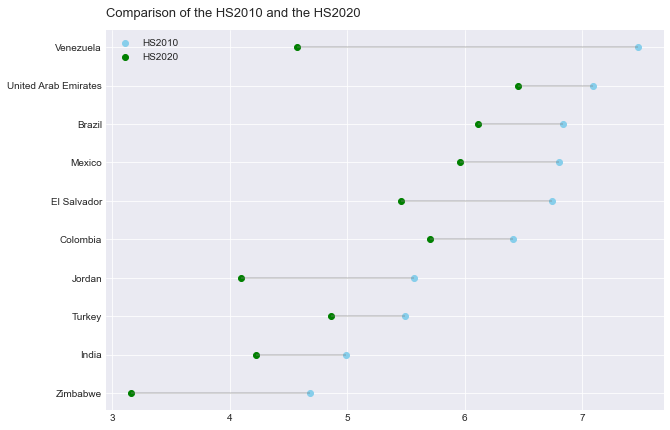

In [164]:
# 행복지수 변화 시각화 
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hlines(y=HS_1020.index, xmin=HS_1020['HS2010'], xmax=HS_1020['HS2020'], color='grey', alpha=0.4)
plt.scatter(HS_1020['HS2010'],HS_1020.index, color='skyblue', alpha=1, label='HS2010')
plt.scatter(HS_1020['HS2020'],HS_1020.index, color='green', alpha=1 , label='HS2020')
plt.legend()
plt.title('Comparison of the HS2010 and the HS2020', loc='left',fontsize=13, fontweight=0, y = 1.02 )
plt.show()

In [165]:
# 2010년 이후의 데이터만 따로 저장 
ndf_10to20 = ndf[ndf.year > 2009]

In [166]:
# 감소한 나라의 log_gdp, life_exp, corruption, birth 변화 알아보기
HS_1020_diff.head(5).index

Index(['Venezuela', 'Zimbabwe', 'Jordan', 'El Salvador', 'Mexico'], dtype='object', name='country')

In [167]:
# 감소한 나라 5개국의 HS, log_gdp, life_exp, corruption, birth 평균 구하기 
filter = ndf_10to20['country'].isin(['Venezuela', 'Zimbabwe', 'Jordan', 'El Salvador', 'Mexico'])
decreasing_10to20 = ndf_10to20[filter][['HS','year','country','log_gdp','life_exp','corruption','birth']].set_index('country')
decreasing_10to20 = decreasing_10to20.groupby(['year']).mean().reset_index()
decreasing_10to20

,year,HS,log_gdp,life_exp,corruption,birth
0,2010,6.2544,9.0902,61.560,0.7416,2.9482
1,2011,5.7232,9.1400,61.988,0.7492,2.9170
2,2012,6.0816,9.1716,62.416,0.7520,2.8784
3,2013,6.0366,9.1534,62.844,0.7588,2.8326
4,2014,5.6380,9.1206,63.272,0.7594,2.7808
5,2015,5.3862,9.0144,63.700,0.7750,2.7246
6,2016,5.2022,9.0200,64.020,0.7918,2.6680
7,2017,5.2532,9.0436,64.340,0.7826,2.6132
8,2018,5.2104,9.0564,64.660,0.8042,2.5632
9,2019,5.0230,9.0390,64.980,0.7800,2.5192


Text(0.0, 1.02, 'Happiness Score change over time')

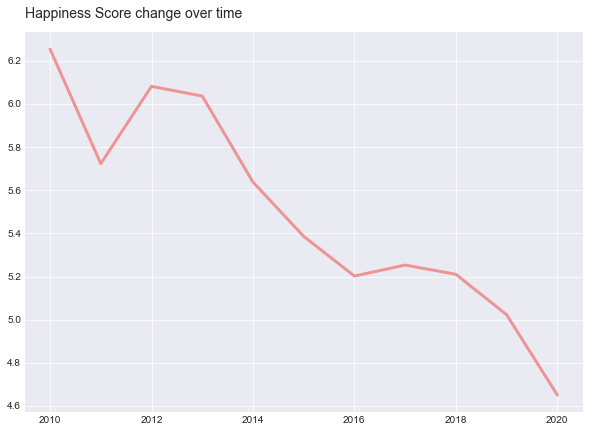

In [168]:
# 감소한 나라의 행복지수 선그래프
plt.figure(figsize=(10,7))
plt.plot(decreasing_10to20['year'], decreasing_10to20['HS'],linewidth=3,color='#ED9595')
plt.title('Happiness Score change over time', loc='left', fontsize=14, fontweight=0,y=1.02)

Text(0.5, 1.0, 'How other features changed?')

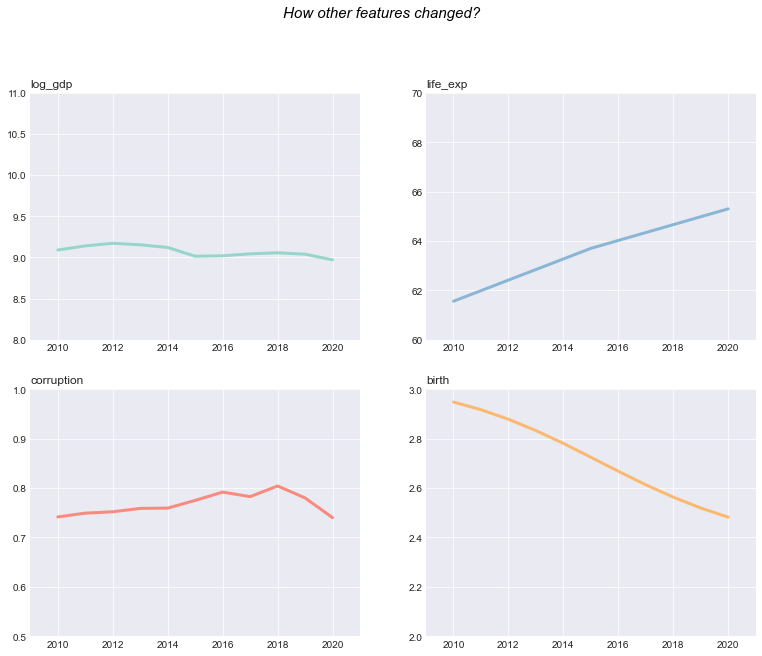

In [169]:
# log_gdp
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.plot(decreasing_10to20['year'].astype('object'),decreasing_10to20['log_gdp'], 
          marker='', linewidth=3, alpha=0.9, label='log_gdp',color=palette(0))
plt.xlim(2009,2021)
plt.ylim(8,11)
plt.title('log_gdp', loc='left', fontsize=12, fontweight=0)

# life_exp
plt.subplot(2,2,2)
plt.plot(decreasing_10to20['year'].astype('object'),decreasing_10to20['life_exp'], 
          marker='', linewidth=3, alpha=0.9,color=palette(4))
plt.xlim(2009,2021)
plt.ylim(60,70)
plt.title('life_exp', loc='left', fontsize=12, fontweight=0)


# corruption
plt.subplot(2,2,3)
plt.plot(decreasing_10to20['year'].astype('object'),decreasing_10to20['corruption'], 
          marker='', linewidth=3, alpha=0.9,color=palette(3))
plt.xlim(2009,2021)
plt.ylim(0.5,1)
plt.title('corruption', loc='left', fontsize=12, fontweight=0)


# birth 
plt.subplot(2,2,4)
plt.plot(decreasing_10to20['year'].astype('object'),decreasing_10to20['birth'], 
          marker='', linewidth=3, alpha=0.9,color=palette(5))
plt.xlim(2009,2021)
plt.ylim(2,3)
plt.title('birth', loc='left', fontsize=12, fontweight=0)

plt.suptitle("How other features changed?", fontsize=15, fontweight=0, color='black', style='italic', y=1.00)

#### b. 2020년에 행복지수가 더 높은 나라 

In [170]:
# 2010년도와 2020년도의 행복지수 차이 내림차순 10개국 (2020 > 2010)
HS_2010_diff = HS_20_max-HS_10_max
HS_2010_diff = HS_2010_diff.to_frame().sort_values(by='HS', ascending=False)
HS_2010_diff.head(10)  

,HS
country,
Bulgaria,1.686
Serbia,1.581
Mongolia,1.425
Lithuania,1.325
Hungary,1.313
Kyrgyzstan,1.254
China,1.118
Georgia,1.021
Tajikistan,0.992


In [171]:
# 2010년 기준 2020년도에 가장 많이 행복지수가 증가한 나라 10개국 
filter = ndf_2010['country'].isin(['Bulgaria', 'Serbia', 'Mongolia', 'Lithuania', 'Hungary', 'Kyrgyzstan',
       'China', 'Georgia', 'Tajikistan', 'Croatia'])
HS_2010 = ndf_2010[filter][['HS','year','country']].set_index('country')

filter = ndf_2020['country'].isin(['Bulgaria', 'Serbia', 'Mongolia', 'Lithuania', 'Hungary', 'Kyrgyzstan',
       'China', 'Georgia', 'Tajikistan', 'Croatia'])
HS_2020 = ndf_2020[filter][['HS','year','country']].set_index('country')

HS_2010 = pd.concat([HS_2010,HS_2020],axis=1).drop(['year'],axis=1)
HS_2010.columns = ["HS2010", "HS2020"]
HS_2010 = HS_2010.sort_values(by='HS2010')
HS_2010 

,HS2010,HS2020
country,,
Bulgaria,3.912,5.598
Georgia,4.102,5.123
Tajikistan,4.381,5.373
Serbia,4.461,6.042
Mongolia,4.586,6.011
China,4.653,5.771
Hungary,4.725,6.038
Kyrgyzstan,4.996,6.250
Lithuania,5.066,6.391


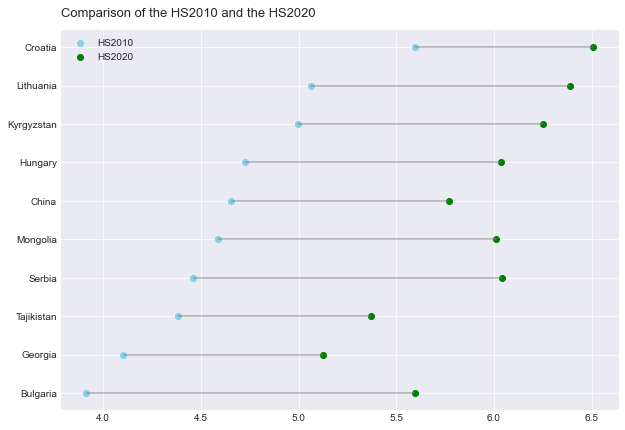

In [173]:
# 변화 시각화
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,7))
plt.hlines(y=HS_2010.index, xmin=HS_2010['HS2010'], xmax=HS_2010['HS2020'], color='grey', alpha=0.6)
plt.scatter(HS_2010['HS2010'],HS_2010.index, color='skyblue', alpha=1, label='HS2010')
plt.scatter(HS_2010['HS2020'],HS_2010.index, color='green', alpha=1 , label='HS2020')
plt.legend()
plt.title('Comparison of the HS2010 and the HS2020',loc='left', fontsize=13, fontweight=0, y = 1.02 )
plt.show()

In [174]:
# 증가한 나라의 log_gdp, life_exp, corruption, birth 변화 알아보기 (상관계수 순)
HS_2010_diff.head(5).index

Index(['Bulgaria', 'Serbia', 'Mongolia', 'Lithuania', 'Hungary'], dtype='object', name='country')

In [175]:
# 증가한 나라 5개국의 HS, log_gdp, life_exp, corruption, birth 평균 구하기 
filter = ndf_10to20['country'].isin(['Bulgaria', 'Serbia', 'Mongolia', 'Lithuania', 'Hungary'])
increasing_10to20 = ndf_10to20[filter][['HS','year','country','log_gdp','life_exp','corruption','birth']].set_index('country')
increasing_10to20 = increasing_10to20.groupby(['year']).mean().reset_index()
increasing_10to20

,year,HS,log_gdp,life_exp,corruption,birth
0,2010,4.5500,9.6910,64.440,0.9558,1.7030
1,2011,4.8142,9.7514,64.624,0.9520,1.7236
2,2012,4.9432,9.7804,64.808,0.9418,1.7426
3,2013,4.9036,9.8204,64.992,0.9292,1.7606
4,2014,5.1366,9.8516,65.176,0.9174,1.7772
5,2015,5.2442,9.8796,65.360,0.9064,1.7916
6,2016,5.3926,9.9074,65.720,0.9198,1.8028
7,2017,5.5782,9.9476,66.080,0.8606,1.8108
8,2018,5.7490,9.9946,66.440,0.8856,1.8152
9,2019,5.7952,10.0368,66.800,0.8592,1.8164


Text(0.0, 1.02, 'Happiness Score change over time')

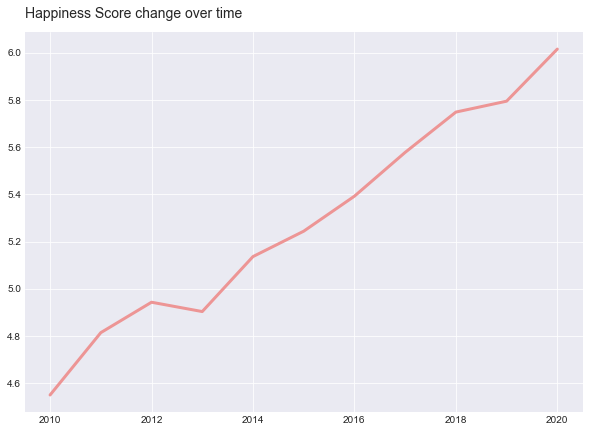

In [176]:
# 증가한 나라의 HS 선그래프
plt.figure(figsize=(10,7))
plt.plot(increasing_10to20['year'], increasing_10to20['HS'],linewidth=3,color='#ED9595')
plt.title('Happiness Score change over time', loc='left', fontsize=14, fontweight=0,y=1.02)

Text(0.5, 1.0, 'How other features changed?')

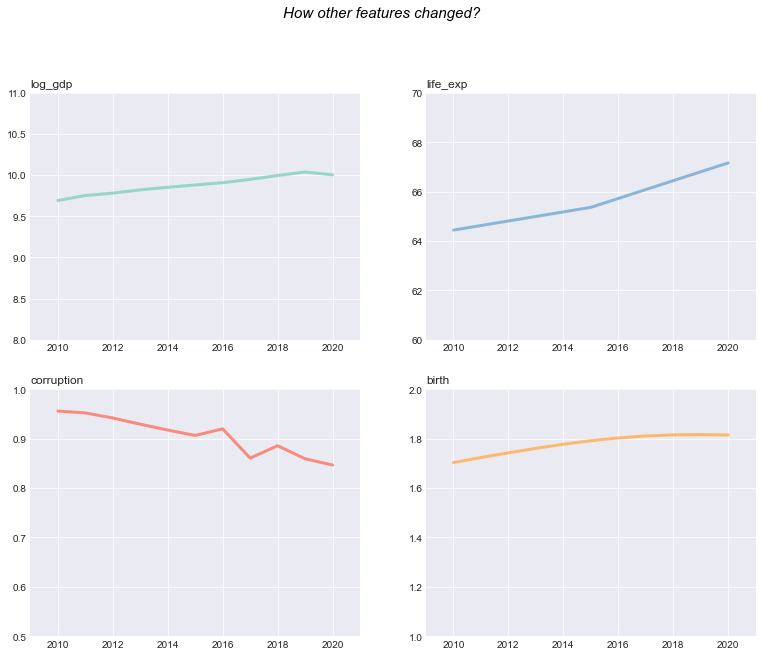

In [142]:
palette = plt.get_cmap('Set3')

# log_gdp
plt.figure(figsize=(13,10))
plt.subplot(2,2,1)
plt.plot(increasing_10to20['year'].astype('object'),increasing_10to20['log_gdp'], 
          marker='', linewidth=3, alpha=0.9, color=palette(0))
plt.xlim(2009,2021)
plt.ylim(8,11)
plt.title('log_gdp', loc='left', fontsize=12, fontweight=0)

# life_exp
plt.subplot(2,2,2)
plt.plot(increasing_10to20['year'].astype('object'),increasing_10to20['life_exp'], 
          marker='', linewidth=3, alpha=0.9, color=palette(4))
plt.xlim(2009,2021)
plt.ylim(60,70)
plt.title('life_exp', loc='left', fontsize=12, fontweight=0)


# corruption
plt.subplot(2,2,3)
plt.plot(increasing_10to20['year'].astype('object'),increasing_10to20['corruption'], 
          marker='', linewidth=3, alpha=0.9,color=palette(3))
plt.xlim(2009,2021)
plt.ylim(0.5,1)
plt.title('corruption', loc='left', fontsize=12, fontweight=0)


# birth 
plt.subplot(2,2,4)
plt.plot(increasing_10to20['year'].astype('object'),increasing_10to20['birth'], 
          marker='', linewidth=3, alpha=0.9,color=palette(5))
plt.xlim(2009,2021)
plt.ylim(1,2)
plt.title('birth', loc='left', fontsize=12, fontweight=0)

plt.suptitle("How other features changed?", fontsize=15, fontweight=0, color='black', style='italic', y=1.00)

##### 일단 이정도 해봤습니다! 하다보니 증가한 나라와 감소한 나라를 합쳐서 한 그래프에 표현하면 좋을 것 같아서 한번 찾아보고 해볼게요..! 